# 🎯 **Project Overview**  
Dalam proyek ini, kita akan melakukan **web scraping** untuk mengambil **ulasan pengguna** dari aplikasi **Programming Hub: Learn to code** di Google Play Store. 

## 🔧 **Libraries Used**

In [1]:
from google_play_scraper import reviews, Sort, app

# Data & Visualisasi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLP dan Preprocessing
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import contractions
import re
import unicodedata
import spacy

# Model dan Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# WordCloud
from wordcloud import WordCloud

# Utility
from collections import Counter

## 🏁 **Tahapan Proyek**  

### 1️⃣  **Scraping Data** → Mengambil ulasan aplikasi menggunakan `google_play_scraper`

In [2]:
info = app('com.freeit.java')  # ID aplikasi programming_hub
print("Versi terbaru:", info['version'])

Versi terbaru: 5.2.40


In [3]:
# Ambil 1000 review terbaru
result, _ = reviews(
    'com.freeit.java',
    lang='en',
    count=1000,
    sort=Sort.NEWEST
)

# Simpan ke dalam variabel filtered_reviews agar tetap kompatibel
filtered_reviews = result

In [4]:
# Simpan hasil filter ke dalam DataFrame
df = pd.DataFrame(filtered_reviews)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,50d71008-ab15-4f73-9850-28931309c226,Vatsal Patel,https://play-lh.googleusercontent.com/a-/ALV-U...,lost my lifetime access after update and even ...,1,0,5.2.40,2025-06-17 00:10:13,"Hi Vatsal, I'm sorry for the inconvenience. Pl...",2025-06-17 00:15:09,5.2.40
1,90349d67-f1e2-43c1-bb8a-906128ac0c70,Joshua Omole Alli,https://play-lh.googleusercontent.com/a/ACg8oc...,"really great app , I found it super helpful th...",5,0,5.2.40,2025-06-16 21:56:32,"Thank you, Joshua Omole Alli! We're thrilled t...",2025-06-16 22:00:04,5.2.40
2,17f11229-1983-4d8f-9779-58b0856b1b68,LYDIA TANUJAYA,https://play-lh.googleusercontent.com/a/ACg8oc...,For me this is the best app for people to use ...,5,0,5.2.40,2025-06-16 20:46:05,"Thank you, Lydia Tanujaya, for your kind words...",2025-06-16 20:50:04,5.2.40
3,897d2044-486b-4b4f-ad4b-9ee4d2da9606,Abdul Hadi N,https://play-lh.googleusercontent.com/a-/ALV-U...,Reducing to 1 star due to poor support from th...,1,1,5.2.40,2025-06-16 19:35:13,"Hi Abdul Hadi N, I'm sorry for the inconvenien...",2025-06-16 19:40:03,5.2.40
4,4166035c-d51b-4794-8d30-7e43ecbe7627,Abdur Rahman,https://play-lh.googleusercontent.com/a/ACg8oc...,It's great till now 😌.,5,0,5.2.40,2025-06-16 18:54:12,"Thank you, Abdur Rahman! We're thrilled to hea...",2025-06-16 18:55:07,5.2.40
...,...,...,...,...,...,...,...,...,...,...,...
995,b0f162af-72e1-489b-825c-39f276d91901,Karan Zine,https://play-lh.googleusercontent.com/a/ACg8oc...,This app givesThis app shows network error.,3,0,5.2.38,2025-03-03 21:33:12,"Hi Karan Zine, thank you for your feedback. We...",2025-03-03 21:35:07,5.2.38
996,a5c18237-ba63-460a-b01b-6af9b2de2c52,Edward K Edward,https://play-lh.googleusercontent.com/a-/ALV-U...,best app for hub learning,5,0,5.2.38,2025-03-03 20:10:55,"Thank you, Edward K Edward! We're thrilled to ...",2025-03-03 20:15:03,5.2.38
997,6c263e83-5485-4a86-abed-3d9b3223d3b7,Jason Logan,https://play-lh.googleusercontent.com/a/ACg8oc...,This app is brilliant for leaning new language...,5,4,5.2.38,2025-03-03 18:51:32,Hi Jason! Thank you for your fantastic review ...,2025-03-03 18:55:03,5.2.38
998,c3778885-56f1-4638-966e-df2a3d6d4b15,Gee Wan Dysuangco-Villegas,https://play-lh.googleusercontent.com/a-/ALV-U...,i am currently learning ethical hacking becaus...,5,0,5.2.38,2025-03-03 17:26:06,"Thank you, Gee Wan Dysuangco-Villegas, for you...",2025-03-03 17:30:07,5.2.38


In [5]:
output_path = "../data/review_programming_hub.xlsx"
df.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_programming_hub.xlsx


In [6]:
# # Import data
# file_path = "../data/review_programming_hub.xlsx"
# df = pd.read_excel(file_path)
# df.head()

In [7]:
df2 = df[['content', 'score']].copy()
df2

,content,score
0,lost my lifetime access after update and even ...,1
1,"really great app , I found it super helpful th...",5
2,For me this is the best app for people to use ...,5
3,Reducing to 1 star due to poor support from th...,1
4,It's great till now 😌.,5
...,...,...
995,This app givesThis app shows network error.,3
996,best app for hub learning,5
997,This app is brilliant for leaning new language...,5
998,i am currently learning ethical hacking becaus...,5


### 2️⃣  **Explore Data** → Mengeksplorasi ulasan aplikasi yang telah diambil

In [8]:
# Melihat jumlah rating ulasan App
df2['score'].value_counts()

score
5    731
1    141
4     71
3     29
2     28
Name: count, dtype: int64

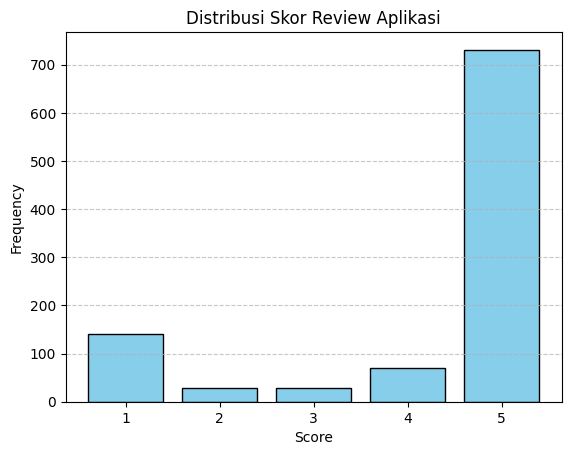

In [9]:
# Histogram skor 1–5
plt.hist(df2['score'], bins=[1, 2, 3, 4, 5, 6], align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks([1, 2, 3, 4, 5])  # Skor tetap integer
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Distribusi Skor Review Aplikasi")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Rangkuman statistik
df2.describe().loc[:, ['score']]

,score
count,1000.000000
mean,4.223000
std,1.446846
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


<Axes: xlabel='at'>

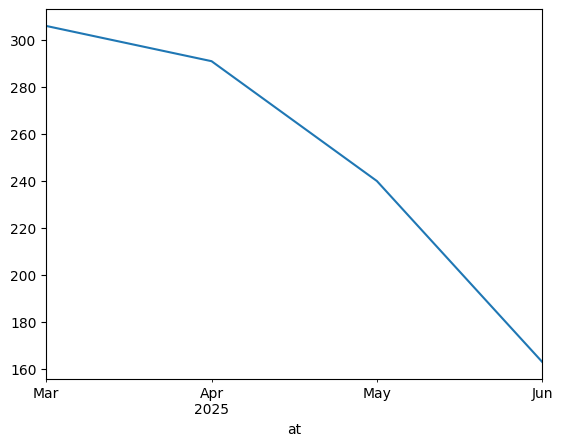

In [11]:
# Grafik jumlah review per bulan.
df['at'] = pd.to_datetime(df['at'])  # Pastikan format datetime
df.set_index('at').resample('ME').count()['reviewId'].plot()


### 3️⃣ **Tahapan Preprocessing**

In [12]:
# ✅ 1. Handling Missing Values → Menghapus atau mengisi data yang kosong  
print(df2.isnull().sum())

content    0
score      0
dtype: int64


In [13]:
# ✅ 2. Lowercasing → Mengubah seluruh teks menjadi huruf kecil  
df2['content_clean'] = df2['content'].astype(str).str.lower()
df2.head(5)

,content,score,content_clean
0,lost my lifetime access after update and even ...,1,lost my lifetime access after update and even ...
1,"really great app , I found it super helpful th...",5,"really great app , i found it super helpful th..."
2,For me this is the best app for people to use ...,5,for me this is the best app for people to use ...
3,Reducing to 1 star due to poor support from th...,1,reducing to 1 star due to poor support from th...
4,It's great till now 😌.,5,it's great till now 😌.


In [14]:
# ✅ 3. Expand Contraction → Mengubah bentuk singkatan menjadi bentuk lengkap (e.g., don't → do not)  
df2['content_clean'] = df2['content_clean'].apply(lambda x: contractions.fix(x))
df2.head(5)

,content,score,content_clean
0,lost my lifetime access after update and even ...,1,lost my lifetime access after update and even ...
1,"really great app , I found it super helpful th...",5,"really great app , i found it super helpful th..."
2,For me this is the best app for people to use ...,5,for me this is the best app for people to use ...
3,Reducing to 1 star due to poor support from th...,1,reducing to 1 star due to poor support from th...
4,It's great till now 😌.,5,it is great till now 😌.


In [15]:
# ✅ 4. Tokenisasi → Memisahkan teks menjadi daftar kata

# Inisialisasi tokenizer Treebank
tokenizer = TreebankWordTokenizer()

# Terapkan tokenisasi
df2['tokens'] = df2['content_clean'].apply(lambda x: tokenizer.tokenize(x))
df2.head(5)


,content,score,content_clean,tokens
0,lost my lifetime access after update and even ...,1,lost my lifetime access after update and even ...,"[lost, my, lifetime, access, after, update, an..."
1,"really great app , I found it super helpful th...",5,"really great app , i found it super helpful th...","[really, great, app, ,, i, found, it, super, h..."
2,For me this is the best app for people to use ...,5,for me this is the best app for people to use ...,"[for, me, this, is, the, best, app, for, peopl..."
3,Reducing to 1 star due to poor support from th...,1,reducing to 1 star due to poor support from th...,"[reducing, to, 1, star, due, to, poor, support..."
4,It's great till now 😌.,5,it is great till now 😌.,"[it, is, great, till, now, 😌, .]"


In [16]:
# ✅ 5. Cabang token untuk VADER 
df2['tokens_vader'] = df2['tokens']

In [17]:
# Stopwords bawaan + custom domain-specific
stop_words = set(stopwords.words('english'))

# Tambahkan custom stopwords domain Play Store
custom_words = {
    'app', 'apps', 'application', 'play', 'store', 'installed', 'install',
    'downloading', 'download', 'device', 'phone', 'mobile', 'using', 'used',
    'google', 'work', 'mimo', 'hub', 'sphero', 'edu','sololearn','codecademy','go','working'  # opsional tergantung fokus topik
}
stop_words.update(custom_words)

# Terapkan stopword removal ke token yang sudah bebas tanda baca
df2['tokens_clean'] = df2['tokens'].apply(lambda tokens: [t for t in tokens if t not in stop_words])


In [18]:
def normalize_token(token):
    # Hapus spasi, simbol, dan karakter unicode aneh
    token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8')
    return token.strip()  # Hapus spasi atau newline

def is_alpha(token):
    return token.isalpha()

df2['tokens_clean'] = df2['tokens_clean'].apply(lambda tokens: [
    normalize_token(t).lower()
    for t in tokens
    if is_alpha(normalize_token(t).strip())
])

df2.head(5)

,content,score,content_clean,tokens,tokens_vader,tokens_clean
0,lost my lifetime access after update and even ...,1,lost my lifetime access after update and even ...,"[lost, my, lifetime, access, after, update, an...","[lost, my, lifetime, access, after, update, an...","[lost, lifetime, access, update, even, emailin..."
1,"really great app , I found it super helpful th...",5,"really great app , i found it super helpful th...","[really, great, app, ,, i, found, it, super, h...","[really, great, app, ,, i, found, it, super, h...","[really, great, found, super, helpful, thanks,..."
2,For me this is the best app for people to use ...,5,for me this is the best app for people to use ...,"[for, me, this, is, the, best, app, for, peopl...","[for, me, this, is, the, best, app, for, peopl...","[best, people, use, learning, code]"
3,Reducing to 1 star due to poor support from th...,1,reducing to 1 star due to poor support from th...,"[reducing, to, 1, star, due, to, poor, support...","[reducing, to, 1, star, due, to, poor, support...","[reducing, star, due, poor, support, customer,..."
4,It's great till now 😌.,5,it is great till now 😌.,"[it, is, great, till, now, 😌, .]","[it, is, great, till, now, 😌, .]","[great, till]"


In [19]:
# Cek baris mana saja yang mengandung token 'nice' sebelum dibersihkan
df2[df2['tokens'].apply(lambda tokens: 'nice' in tokens)]


,content,score,content_clean,tokens,tokens_vader,tokens_clean
53,"Good learning app, easy to understand and it's...",5,"good learning app, easy to understand and it i...","[good, learning, app, ,, easy, to, understand,...","[good, learning, app, ,, easy, to, understand,...","[good, learning, easy, understand, nice]"
54,It's a nice app..,5,it is a nice app..,"[it, is, a, nice, app..]","[it, is, a, nice, app..]",[nice]
57,it's a really nice app for learning coding,5,it is a really nice app for learning coding,"[it, is, a, really, nice, app, for, learning, ...","[it, is, a, really, nice, app, for, learning, ...","[really, nice, learning, coding]"
75,nice,5,nice,[nice],[nice],[nice]
76,nice,5,nice,[nice],[nice],[nice]
...,...,...,...,...,...,...
864,very nice,5,very nice,"[very, nice]","[very, nice]",[nice]
871,Very nice,5,very nice,"[very, nice]","[very, nice]",[nice]
920,Nice 👍,5,nice 👍,"[nice, 👍]","[nice, 👍]",[nice]
982,Nice app,4,nice app,"[nice, app]","[nice, app]",[nice]


In [20]:
#✅ 8. Lemmatization
# Load model spaCy
nlp = spacy.load("en_core_web_sm")

# Fungsi lemmatizer menggunakan spaCy
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))  # Gabungkan token ke dalam satu string untuk diproses
    return [token.lemma_ for token in doc]

# Lemmatisasi kolom 'tokens_clean'
df2['tokens_clean_lemma'] = df2['tokens_clean'].apply(lemmatize_tokens)
df2.head(5)


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma
0,lost my lifetime access after update and even ...,1,lost my lifetime access after update and even ...,"[lost, my, lifetime, access, after, update, an...","[lost, my, lifetime, access, after, update, an...","[lost, lifetime, access, update, even, emailin...","[lose, lifetime, access, update, even, email, ..."
1,"really great app , I found it super helpful th...",5,"really great app , i found it super helpful th...","[really, great, app, ,, i, found, it, super, h...","[really, great, app, ,, i, found, it, super, h...","[really, great, found, super, helpful, thanks,...","[really, great, find, super, helpful, thank, g..."
2,For me this is the best app for people to use ...,5,for me this is the best app for people to use ...,"[for, me, this, is, the, best, app, for, peopl...","[for, me, this, is, the, best, app, for, peopl...","[best, people, use, learning, code]","[good, people, use, learn, code]"
3,Reducing to 1 star due to poor support from th...,1,reducing to 1 star due to poor support from th...,"[reducing, to, 1, star, due, to, poor, support...","[reducing, to, 1, star, due, to, poor, support...","[reducing, star, due, poor, support, customer,...","[reduce, star, due, poor, support, customer, r..."
4,It's great till now 😌.,5,it is great till now 😌.,"[it, is, great, till, now, 😌, .]","[it, is, great, till, now, 😌, .]","[great, till]","[great, till]"


In [21]:
#✅ 9. Removing Rare Words (frekuensi < 3)

# Gabungkan semua token dari seluruh review menjadi satu list
all_clean_lemmas = [token for tokens in df2['tokens_clean_lemma'] for token in tokens]

# Hitung frekuensi kata
token_freq = Counter(all_clean_lemmas)

# Ambil kata-kata yang muncul ≥ 3 kali
min_freq = 3
valid_tokens = set([token for token, freq in token_freq.items() if freq >= min_freq])

# Hapus token yang tidak termasuk dalam set valid_tokens
df2['tokens_clean_final'] = df2['tokens_clean_lemma'].apply(lambda tokens: [t for t in tokens if t in valid_tokens])
df2.head()


,content,score,content_clean,tokens,tokens_vader,tokens_clean,tokens_clean_lemma,tokens_clean_final
0,lost my lifetime access after update and even ...,1,lost my lifetime access after update and even ...,"[lost, my, lifetime, access, after, update, an...","[lost, my, lifetime, access, after, update, an...","[lost, lifetime, access, update, even, emailin...","[lose, lifetime, access, update, even, email, ...","[lose, lifetime, access, update, even, email, ..."
1,"really great app , I found it super helpful th...",5,"really great app , i found it super helpful th...","[really, great, app, ,, i, found, it, super, h...","[really, great, app, ,, i, found, it, super, h...","[really, great, found, super, helpful, thanks,...","[really, great, find, super, helpful, thank, g...","[really, great, find, super, helpful, thank, g..."
2,For me this is the best app for people to use ...,5,for me this is the best app for people to use ...,"[for, me, this, is, the, best, app, for, peopl...","[for, me, this, is, the, best, app, for, peopl...","[best, people, use, learning, code]","[good, people, use, learn, code]","[good, people, use, learn, code]"
3,Reducing to 1 star due to poor support from th...,1,reducing to 1 star due to poor support from th...,"[reducing, to, 1, star, due, to, poor, support...","[reducing, to, 1, star, due, to, poor, support...","[reducing, star, due, poor, support, customer,...","[reduce, star, due, poor, support, customer, r...","[star, due, poor, support, customer, recently,..."
4,It's great till now 😌.,5,it is great till now 😌.,"[it, is, great, till, now, 😌, .]","[it, is, great, till, now, 😌, .]","[great, till]","[great, till]","[great, till]"


In [22]:
# ✅ 10. Handling Missing Values → Menghapus data yang kosong 

print("Jumlah baris SEBELUM pembersihan:", len(df2))

# Hapus baris jika kolom 'tokens' kosong (NaN atau [])
df2 = df2[~df2['tokens_clean_final'].isnull()]                            # Hapus jika NaN
df2 = df2[df2['tokens_clean_final'].apply(lambda x: len(x) > 0)]          # Hapus jika list kosong []

# Reset index agar rapi (opsional)
df2 = df2.reset_index(drop=True)

# Tampilkan jumlah baris setelah pembersihan
print("Jumlah baris SESUDAH pembersihan:", len(df2))

Jumlah baris SEBELUM pembersihan: 1000
Jumlah baris SESUDAH pembersihan: 959


### 4️⃣ **Cek Sentiment Analysis - Textblob**

In [23]:
# Hitung sentimen dengan aman menggunakan .loc
df2.loc[:, 'sentiment_polarity'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.polarity)
df2.loc[:, 'sentiment_subjective'] = df2['tokens_clean_final'].apply(lambda tokens: TextBlob(" ".join(tokens)).sentiment.subjectivity)

In [24]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df2['sentiment_rating'] = df2['score'].apply(lambda x: 'positive' if x > 3 else('neutral' if x == 3  else 'negative'))

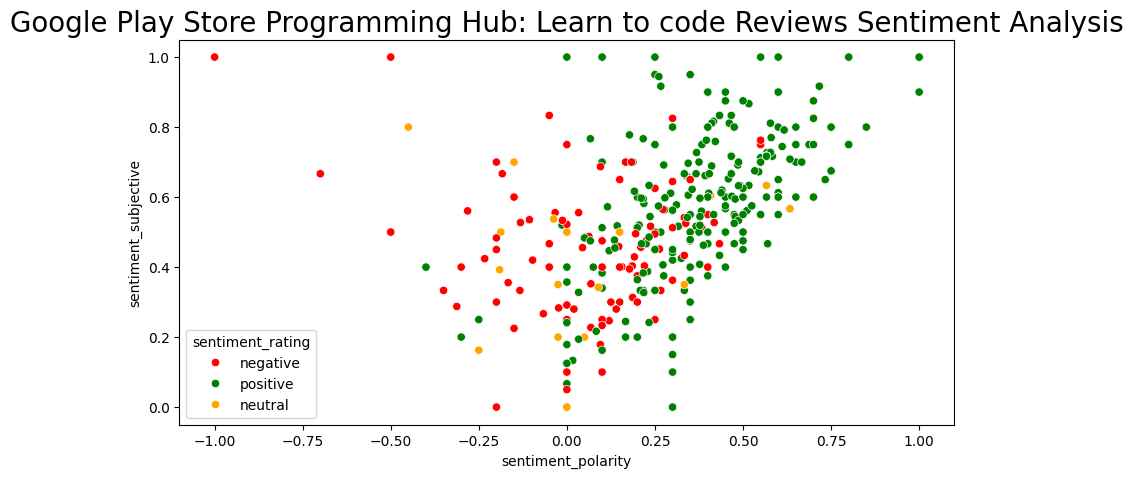

In [25]:
# Mapping warna manual untuk hue
custom_palette = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'red'
}

plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='sentiment_polarity',
    y='sentiment_subjective',
    hue='sentiment_rating',
    data=df2,
    edgecolor='white',
    palette=custom_palette
)
plt.title("Google Play Store Programming Hub: Learn to code Reviews Sentiment Analysis", fontsize=20)
plt.show()


In [26]:
# Hitung jumlah masing-masing kategori
rating_counts = df2['sentiment_rating'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan jumlah frekuensinya
print("📊 Jumlah Review per Kategori Berdasarkan Score:")
for sentiment, count in rating_counts.items():
    print(f"- {sentiment:<8}: {count} review")

📊 Jumlah Review per Kategori Berdasarkan Score:
- positive: 764 review
- neutral : 28 review
- negative: 167 review


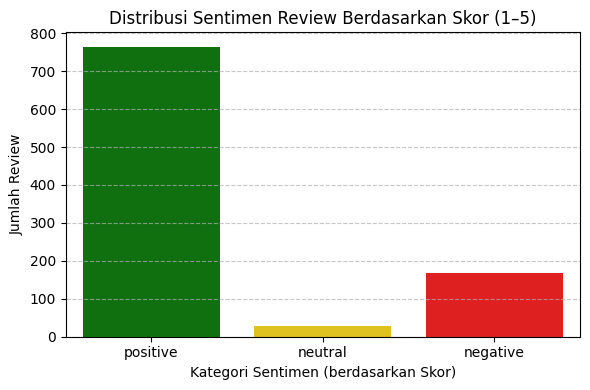

In [27]:
# Siapkan DataFrame untuk visualisasi
rating_df = rating_counts.reset_index()
rating_df.columns = ['sentiment', 'count']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=rating_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen (berdasarkan Skor)")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review Berdasarkan Skor (1–5)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

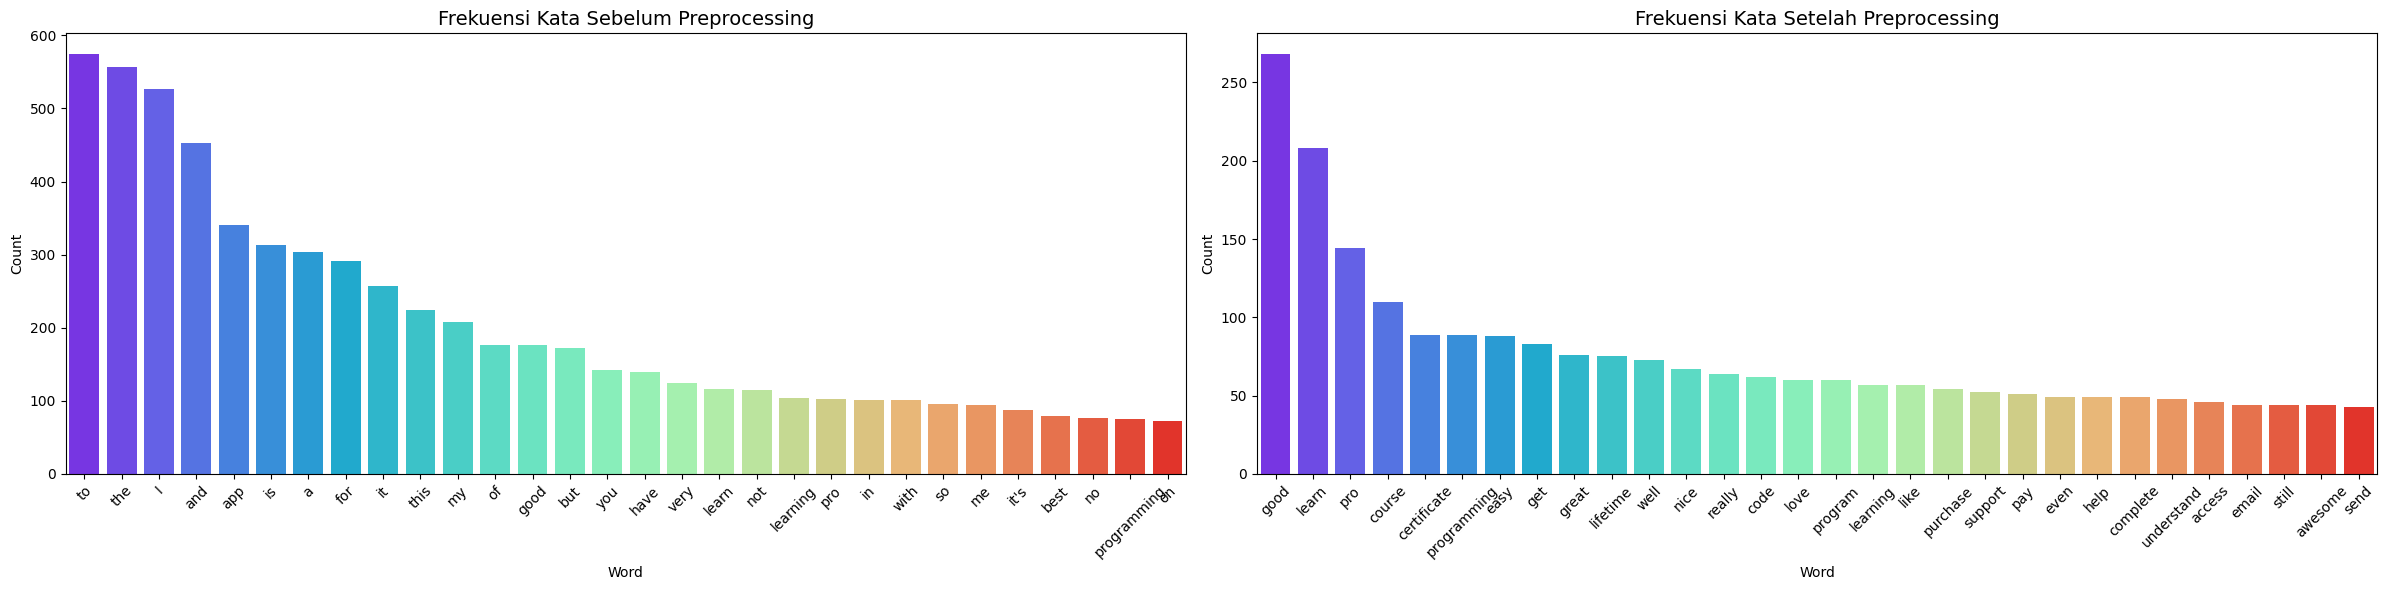

In [28]:
# Fungsi untuk visualisasi frekuensi kata
def freq_words(ax, text_series, terms=30, title="Frekuensi Kata"):
    all_words = ' '.join([text for text in text_series])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word': list(fdist.keys()), 'count': list(fdist.values())})
    top_words = words_df.nlargest(columns="count", n=terms)
    
    sns.barplot(data=top_words, x="word", y="count", hue="word", palette="rainbow", legend=False, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel("Count")
    ax.set_xlabel("Word")
    ax.tick_params(axis='x', rotation=45)

# Pastikan tidak ada nilai NaN
df2['content'] = df2['content'].fillna('').astype(str)

# Gabungkan token menjadi string untuk versi "after"
df2['clean_text_final'] = df2['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens))

# Buat 2 subplots untuk before & after
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Ganti judul tanpa emoji
freq_words(axes[0], df2['content'], title="Frekuensi Kata Sebelum Preprocessing")
freq_words(axes[1], df2['clean_text_final'], title="Frekuensi Kata Setelah Preprocessing")

plt.tight_layout()
plt.show()

### 5️⃣ **Cek Sentiment Analysis - Vader**

In [29]:
# Unduh lexicon VADER jika belum
# nltk.download('vader_lexicon')

# Inisialisasi analyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [30]:
df_vader = df2[['tokens_vader']].copy()
# Gabungkan token menjadi kalimat
df_vader['text'] = df_vader['tokens_vader'].apply(lambda tokens: ' '.join(tokens))

df_vader.head(5)

,tokens_vader,text
0,"[lost, my, lifetime, access, after, update, an...",lost my lifetime access after update and even ...
1,"[really, great, app, ,, i, found, it, super, h...","really great app , i found it super helpful th..."
2,"[for, me, this, is, the, best, app, for, peopl...",for me this is the best app for people to use ...
3,"[reducing, to, 1, star, due, to, poor, support...",reducing to 1 star due to poor support from th...
4,"[it, is, great, till, now, 😌, .]",it is great till now 😌 .


In [31]:
# Fungsi untuk mengembalikan skor dari VADER
def get_vader_scores(text):
    return vader_analyzer.polarity_scores(text)

# Hitung skor dan ubah jadi kolom DataFrame
vader_scores = df_vader['text'].apply(get_vader_scores).apply(pd.Series)
df_vader = pd.concat([df_vader, vader_scores], axis=1)

In [32]:
# Kategorikan Sentimen
def categorize_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_vader['vader_sentiment'] = df_vader['compound'].apply(categorize_sentiment)

In [33]:
df_vader.head(5)

,tokens_vader,text,neg,neu,pos,compound,vader_sentiment
0,"[lost, my, lifetime, access, after, update, an...",lost my lifetime access after update and even ...,0.257,0.743,0.000,-0.5423,negative
1,"[really, great, app, ,, i, found, it, super, h...","really great app , i found it super helpful th...",0.000,0.216,0.784,0.9595,positive
2,"[for, me, this, is, the, best, app, for, peopl...",for me this is the best app for people to use ...,0.000,0.781,0.219,0.6369,positive
3,"[reducing, to, 1, star, due, to, poor, support...",reducing to 1 star due to poor support from th...,0.080,0.789,0.131,0.4767,positive
4,"[it, is, great, till, now, 😌, .]",it is great till now 😌 .,0.000,0.494,0.506,0.6249,positive


In [34]:
# Hitung jumlah masing-masing kategori sentimen
sentiment_counts = df_vader['vader_sentiment'].value_counts().reindex(['positive', 'neutral', 'negative'], fill_value=0)

# Tampilkan frekuensi
print("📊 Jumlah Review per Kategori Sentimen (VADER):")
for sentiment, count in sentiment_counts.items():
    print(f"- {sentiment.capitalize():<8}: {count} review")

📊 Jumlah Review per Kategori Sentimen (VADER):
- Positive: 794 review
- Neutral : 72 review
- Negative: 93 review


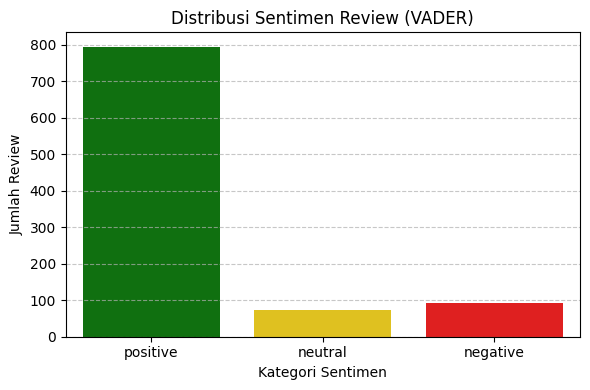

In [35]:
# Siapkan DataFrame untuk visualisasi
sentiment_df = sentiment_counts.reset_index()
sentiment_df.columns = ['sentiment', 'count']

# Buat barplot
plt.figure(figsize=(6, 4))
sns.barplot(
    data=sentiment_df,
    x='sentiment',
    y='count',
    hue='sentiment',
    palette={'positive': 'green', 'neutral': 'gold', 'negative': 'red'},
    legend=False
)

plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen Review (VADER)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
# Gabungkan kolom ke dalam satu DataFrame
df_compare = df2[['score', 'sentiment_rating']].copy()
df_compare['vader_sentiment'] = df_vader['vader_sentiment']

In [37]:
# Hitung jumlah masing-masing kombinasi kategori
compare_counts = df_compare.groupby(['sentiment_rating', 'vader_sentiment']).size().unstack(fill_value=0)
print("📊 Tabel Perbandingan Sentimen (Score vs VADER):\n")
print(compare_counts)

📊 Tabel Perbandingan Sentimen (Score vs VADER):

vader_sentiment   negative  neutral  positive
sentiment_rating                             
negative                67       24        76
neutral                  8        9        11
positive                18       39       707


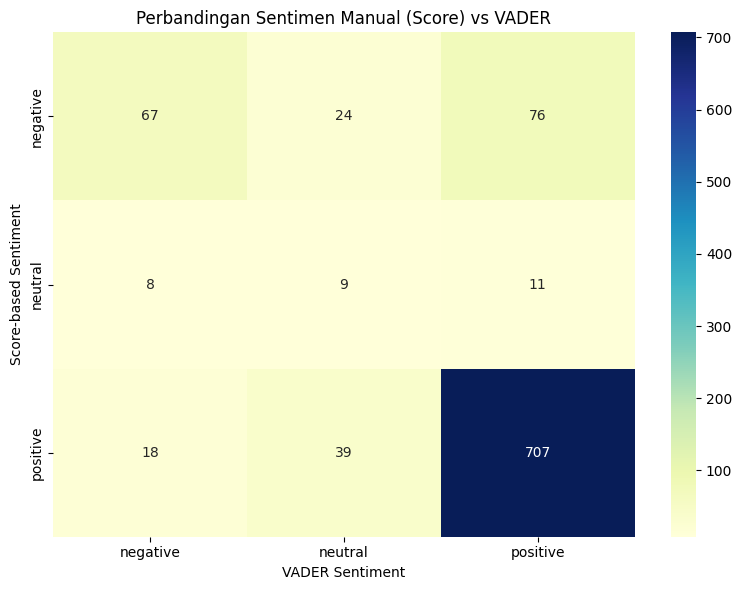

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(compare_counts, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Perbandingan Sentimen Manual (Score) vs VADER")
plt.xlabel("VADER Sentiment")
plt.ylabel("Score-based Sentiment")
plt.tight_layout()
plt.show()

In [39]:
# Buat kolom baru untuk mengecek apakah label cocok
df_compare['sentiment_match'] = df_compare['sentiment_rating'].str.lower() == df_compare['vader_sentiment']

total_reviews = len(df_compare)
matched = df_compare['sentiment_match'].sum()
accuracy = matched / total_reviews
print(f"✅ Total review         : {total_reviews}")
print(f"✅ Jumlah yang cocok    : {matched}")
print(f"📊 Akurasi Kesesuaian   : {accuracy:.2%}")


✅ Total review         : 959
✅ Jumlah yang cocok    : 783
📊 Akurasi Kesesuaian   : 81.65%


### 6️⃣ **Topic Modelling**

In [40]:
# Buat dataset baru untuk data model
df_modelling = df2[['tokens_clean_final']].copy()
df_modelling['clean_text_final'] = df_modelling['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [41]:
df_modelling.head(5)

,tokens_clean_final,clean_text_final
0,"[lose, lifetime, access, update, even, email, ...",lose lifetime access update even email several...
1,"[really, great, find, super, helpful, thank, g...",really great find super helpful thank guy love
2,"[good, people, use, learn, code]",good people use learn code
3,"[star, due, poor, support, customer, recently,...",star due poor support customer recently change...
4,"[great, till]",great till


In [42]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,       # Hapus kata yang terlalu umum (muncul di >95% dokumen)
    min_df=2,          # Hapus kata yang sangat langka (muncul <2 dokumen)
    ngram_range=(1, 2)  # Termasuk bigram: meningkatkan konteks topik
)

# Transformasi ke TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(df_modelling['clean_text_final'])

In [43]:
# Tentukan jumlah topik
n_topics = 5  

# Inisialisasi dan training NMF
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_model.fit(X_tfidf)


,n_components,5
,init,None
,solver,'cd'
,beta_loss,'frobenius'
,tol,0.0001
,max_iter,200
,random_state,42
,alpha_W,0.0
,alpha_H,'same'
,l1_ratio,0.0
,verbose,0


In [44]:
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"\n🧠 Topik {topic_idx+1}:")
        print(", ".join(top_features))

# Panggil fungsi
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
display_topics(nmf_model, tfidf_feature_names)


🧠 Topik 1:
good, good learning, learning, good learn, good beginner, good programming, beginner, good good, really good, programming

🧠 Topik 2:
nice, nice learn, beginner, video, experience, useful, bad, teaching, aap, programming

🧠 Topik 3:
great, far, great learn, great learning, great easy, experience, learning, service, coding, absolutely

🧠 Topik 4:
learn, easy, well, easy learn, love, programming, understand, code, program, well learn

🧠 Topik 5:
awesome, awesome learn, beginner, content, friendly, wait, code, learning code, enjoy, start


In [45]:
# Mapping topik ke label tematik (edit sesuai kebutuhan dan interpretasi manual)
topic_labels = {
    0: "Topik 1 - Pengalaman Belajar Positif untuk Pemula",
    1: "Topik 2 - Kualitas Materi & Pengalaman Pembelajaran",
    2: "Topik 3 - Kecintaan & Kepuasan terhadap Aplikasi",
    3: "Topik 4 - Kemudahan dan Pemahaman dalam Belajar",
    4: "Topik 5 - Antusiasme Belajar Coding untuk Pemula"
}
def display_labeled_topics(model, feature_names, topic_labels, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        label = topic_labels.get(topic_idx, f"Topik {topic_idx+1}")  # fallback jika label tidak tersedia
        print(f"\n🧠 {label}")
        print("🔑 Kata Kunci:", ", ".join(top_features))

# Panggil fungsi
display_labeled_topics(nmf_model, tfidf_feature_names, topic_labels)


🧠 Topik 1 - Pengalaman Belajar Positif untuk Pemula
🔑 Kata Kunci: good, good learning, learning, good learn, good beginner, good programming, beginner, good good, really good, programming

🧠 Topik 2 - Kualitas Materi & Pengalaman Pembelajaran
🔑 Kata Kunci: nice, nice learn, beginner, video, experience, useful, bad, teaching, aap, programming

🧠 Topik 3 - Kecintaan & Kepuasan terhadap Aplikasi
🔑 Kata Kunci: great, far, great learn, great learning, great easy, experience, learning, service, coding, absolutely

🧠 Topik 4 - Kemudahan dan Pemahaman dalam Belajar
🔑 Kata Kunci: learn, easy, well, easy learn, love, programming, understand, code, program, well learn

🧠 Topik 5 - Antusiasme Belajar Coding untuk Pemula
🔑 Kata Kunci: awesome, awesome learn, beginner, content, friendly, wait, code, learning code, enjoy, start


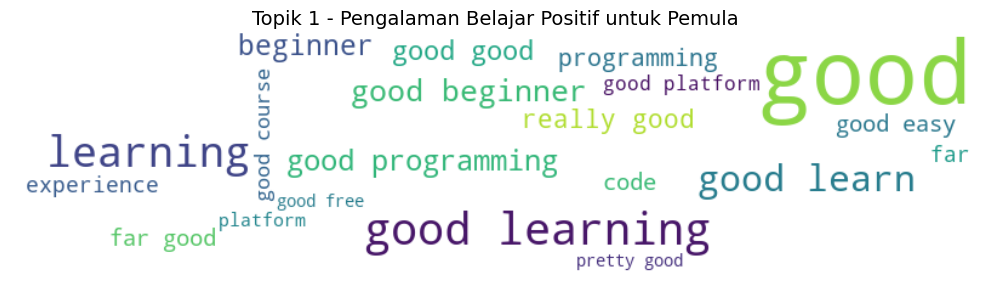

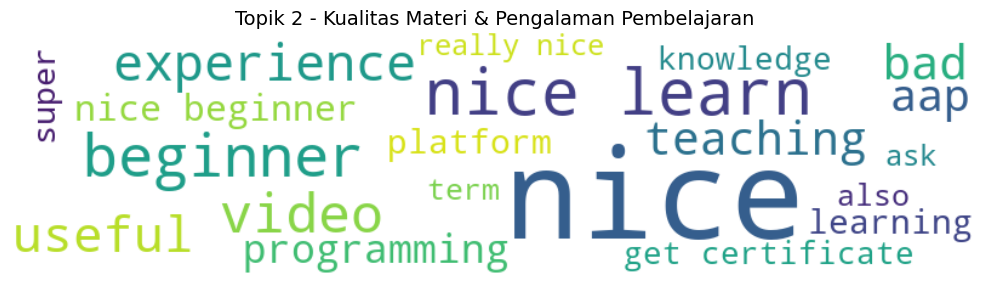

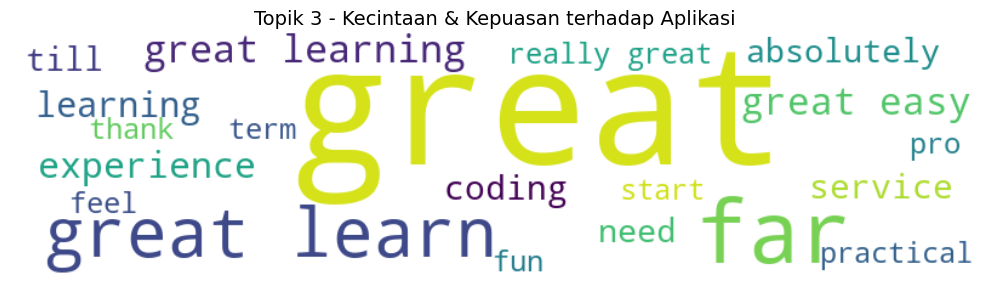

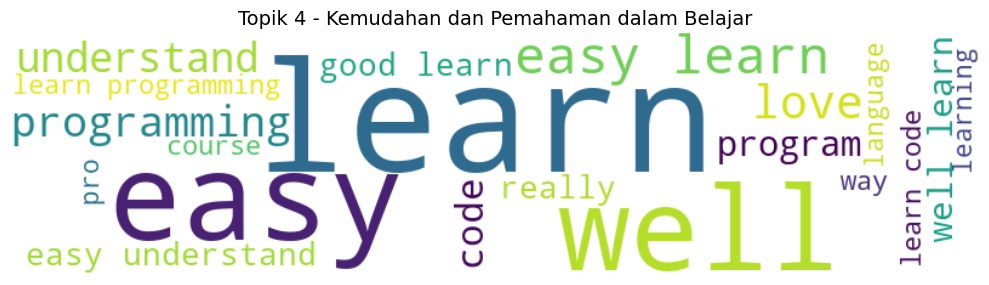

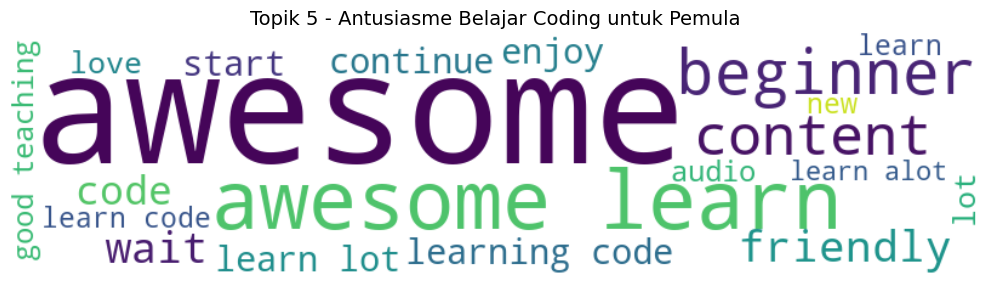

In [46]:
def plot_wordclouds_with_labels(model, feature_names, topic_labels, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        top_features = {feature_names[i]: topic[i] for i in topic.argsort()[:-n_top_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=200, background_color='white').generate_from_frequencies(top_features)

        label = topic_labels.get(topic_idx, f"Topik {topic_idx + 1}")
        
        plt.figure(figsize=(10, 3))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"{label}", fontsize=14)
        plt.tight_layout()
        plt.show()


# Jalankan visualisasi WordCloud
plot_wordclouds_with_labels(nmf_model, tfidf_feature_names, topic_labels)

In [47]:
# Dapatkan distribusi topik tiap dokumen
topic_distribution = nmf_model.transform(X_tfidf)

# Ambil topik dominan untuk setiap review
df_modelling['dominant_topic'] = topic_distribution.argmax(axis=1)

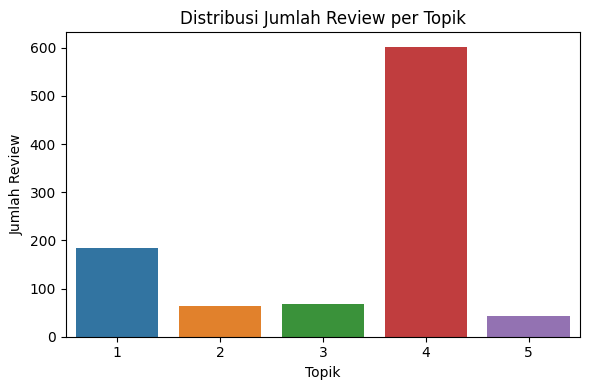

In [48]:
# Buat salinan kolom untuk ditampilkan sebagai 1-based indexing
df_modelling['dominant_topic_display'] = df_modelling['dominant_topic'] + 1

# Visualisasi distribusi topik dengan label mulai dari 1
plt.figure(figsize=(6, 4))
sns.countplot(
    x='dominant_topic_display',
    data=df_modelling,
    hue='dominant_topic_display',
    palette='tab10',
    legend=False
)
plt.title("Distribusi Jumlah Review per Topik")
plt.xlabel("Topik")
plt.ylabel("Jumlah Review")
plt.tight_layout()
plt.show()


In [49]:
df_modelling['jenis_topik'] = df_modelling['dominant_topic'].map(topic_labels) 
df_modelling.head(5)

,tokens_clean_final,clean_text_final,dominant_topic,dominant_topic_display,jenis_topik
0,"[lose, lifetime, access, update, even, email, ...",lose lifetime access update even email several...,3,4,Topik 4 - Kemudahan dan Pemahaman dalam Belajar
1,"[really, great, find, super, helpful, thank, g...",really great find super helpful thank guy love,2,3,Topik 3 - Kecintaan & Kepuasan terhadap Aplikasi
2,"[good, people, use, learn, code]",good people use learn code,3,4,Topik 4 - Kemudahan dan Pemahaman dalam Belajar
3,"[star, due, poor, support, customer, recently,...",star due poor support customer recently change...,3,4,Topik 4 - Kemudahan dan Pemahaman dalam Belajar
4,"[great, till]",great till,2,3,Topik 3 - Kecintaan & Kepuasan terhadap Aplikasi


### 7️⃣ **Clustering**

In [50]:
# Buat dataset baru untuk data model
df_clustering = df2[['tokens_clean_final']].copy()
df_clustering['clean_text_final'] = df_clustering['tokens_clean_final'].apply(lambda tokens: ' '.join(tokens)) 

In [51]:
df_clustering.head(5)

,tokens_clean_final,clean_text_final
0,"[lose, lifetime, access, update, even, email, ...",lose lifetime access update even email several...
1,"[really, great, find, super, helpful, thank, g...",really great find super helpful thank guy love
2,"[good, people, use, learn, code]",good people use learn code
3,"[star, due, poor, support, customer, recently,...",star due poor support customer recently change...
4,"[great, till]",great till


In [52]:
# Vectorizer untuk clustering (gunakan unigram dulu agar stabil)
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=2,
    stop_words='english',
    ngram_range=(1, 1)
)

X_tfidf = tfidf_vectorizer.fit_transform(df_clustering['clean_text_final'])

In [53]:
# Tentukan jumlah cluster (misalnya 5, bisa diuji nanti)
n_clusters = 5
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(X_tfidf)

# Simpan label cluster ke DataFrame
df_clustering['cluster'] = kmeans_model.labels_

In [54]:
# Ambil nama fitur dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
def show_top_keywords_per_cluster(kmeans_model, feature_names, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil index fitur tertinggi
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        print(f"\n🔷 Cluster {cluster_num}:")
        print("   " + ", ".join(top_keywords))

# Panggil fungsi
show_top_keywords_per_cluster(kmeans_model, feature_names)


🔷 Cluster 0:
   learn, easy, good, programming, code, language, way, program, python, really

🔷 Cluster 1:
   good, learning, far, beginner, programming, course, thank, code, really, easy

🔷 Cluster 2:
   nice, beginner, learning, learn, aap, video, teaching, good, useful, bad

🔷 Cluster 3:
   love, course, certificate, complete, learn, really, pro, free, help, issue

🔷 Cluster 4:
   great, good, awesome, pro, amazing, learning, excellent, easy, helpful, like


In [55]:
# Mapping label deskriptif untuk tiap cluster
cluster_labels = {
    0: "Cluster 1 - Pengalaman Pengguna terhadap Layanan & Keanggotaan",
    1: "Cluster 2 - Antusiasme & Kepuasan terhadap Pembelajaran",
    2: "Cluster 3 - Harapan Pemula & Kebutuhan Fitur Belajar",
    3: "Cluster 4 - Pengalaman Belajar Coding untuk Pemula",
    4: "Cluster 5 - Pengajaran Profesional & Pemahaman Mendalam"
}


def show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels, n_terms=10):
    for cluster_num, cluster_center in enumerate(kmeans_model.cluster_centers_):
        # Ambil top-n kata per cluster
        top_indices = cluster_center.argsort()[::-1][:n_terms]
        top_keywords = [feature_names[i] for i in top_indices]
        
        # Ambil label deskriptif dari mapping
        label = cluster_labels.get(cluster_num, f"Cluster {cluster_num}")
        
        print(f"\n🔷 {label}:")
        print("   " + ", ".join(top_keywords))

show_labeled_keywords_per_cluster(kmeans_model, feature_names, cluster_labels)


🔷 Cluster 1 - Pengalaman Pengguna terhadap Layanan & Keanggotaan:
   learn, easy, good, programming, code, language, way, program, python, really

🔷 Cluster 2 - Antusiasme & Kepuasan terhadap Pembelajaran:
   good, learning, far, beginner, programming, course, thank, code, really, easy

🔷 Cluster 3 - Harapan Pemula & Kebutuhan Fitur Belajar:
   nice, beginner, learning, learn, aap, video, teaching, good, useful, bad

🔷 Cluster 4 - Pengalaman Belajar Coding untuk Pemula:
   love, course, certificate, complete, learn, really, pro, free, help, issue

🔷 Cluster 5 - Pengajaran Profesional & Pemahaman Mendalam:
   great, good, awesome, pro, amazing, learning, excellent, easy, helpful, like


In [56]:
# Reduksi dimensi
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
tsne_results = tsne_model.fit_transform(X_tfidf.toarray())

# Simpan hasil TSNE ke DataFrame
df_clustering['tsne_x'] = tsne_results[:, 0]
df_clustering['tsne_y'] = tsne_results[:, 1]

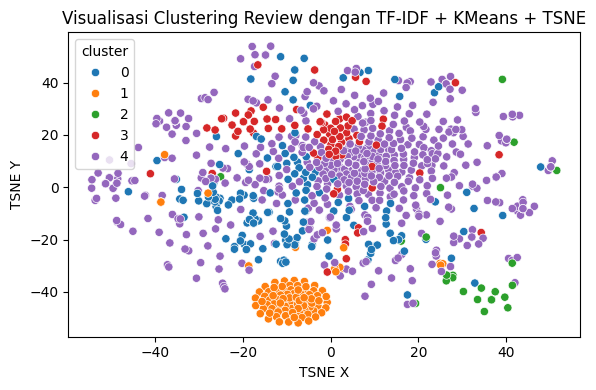

In [57]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='tsne_x', y='tsne_y',
    hue='cluster',
    data=df_clustering,
    palette='tab10',
    legend='full'
)

plt.title("Visualisasi Clustering Review dengan TF-IDF + KMeans + TSNE")
plt.xlabel("TSNE X")
plt.ylabel("TSNE Y")
plt.tight_layout()
plt.show()

In [58]:
# Buat kolom baru berdasarkan mapping
df_clustering['cluster_label'] = df_clustering['cluster'].map(cluster_labels)
df_clustering.head(5)

,tokens_clean_final,clean_text_final,cluster,tsne_x,tsne_y,cluster_label
0,"[lose, lifetime, access, update, even, email, ...",lose lifetime access update even email several...,4,10.939353,12.688790,Cluster 5 - Pengajaran Profesional & Pemahaman...
1,"[really, great, find, super, helpful, thank, g...",really great find super helpful thank guy love,3,38.374664,12.411201,Cluster 4 - Pengalaman Belajar Coding untuk Pe...
2,"[good, people, use, learn, code]",good people use learn code,0,-4.203950,-21.979265,Cluster 1 - Pengalaman Pengguna terhadap Layan...
3,"[star, due, poor, support, customer, recently,...",star due poor support customer recently change...,4,14.501196,12.300463,Cluster 5 - Pengajaran Profesional & Pemahaman...
4,"[great, till]",great till,4,-45.451447,9.028000,Cluster 5 - Pengajaran Profesional & Pemahaman...


### 8️⃣ **Penggabungan Data Hasil Review**

In [59]:
# Pastikan indexnya sejajar dan urutan review konsisten
df_final = pd.concat([
    df2[['content', 'score', 'sentiment_rating']].reset_index(drop=True),
    df_vader[['vader_sentiment']].reset_index(drop=True),
    df_modelling[['jenis_topik']].reset_index(drop=True),
    df_clustering[['cluster_label']].reset_index(drop=True)
], axis=1)

In [60]:
df_final.head(5)

,content,score,sentiment_rating,vader_sentiment,jenis_topik,cluster_label
0,lost my lifetime access after update and even ...,1,negative,negative,Topik 4 - Kemudahan dan Pemahaman dalam Belajar,Cluster 5 - Pengajaran Profesional & Pemahaman...
1,"really great app , I found it super helpful th...",5,positive,positive,Topik 3 - Kecintaan & Kepuasan terhadap Aplikasi,Cluster 4 - Pengalaman Belajar Coding untuk Pe...
2,For me this is the best app for people to use ...,5,positive,positive,Topik 4 - Kemudahan dan Pemahaman dalam Belajar,Cluster 1 - Pengalaman Pengguna terhadap Layan...
3,Reducing to 1 star due to poor support from th...,1,negative,positive,Topik 4 - Kemudahan dan Pemahaman dalam Belajar,Cluster 5 - Pengajaran Profesional & Pemahaman...
4,It's great till now 😌.,5,positive,positive,Topik 3 - Kecintaan & Kepuasan terhadap Aplikasi,Cluster 5 - Pengajaran Profesional & Pemahaman...


In [61]:
output_path = "../data/review_final_programming_hub.xlsx"
df_final.to_excel(output_path, index=False)
print(f"✅ Data berhasil disimpan ke {output_path}")

✅ Data berhasil disimpan ke ../data/review_final_programming_hub.xlsx
